In [1]:
# Triada calsica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
import missingno as msngo

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Modulo de funciones especiales y graficos
import func as gfx

# Otras librerias, configuraciones e instancias
labelencoder = LabelEncoder()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('Datasets/compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.columns = df.columns.map(lambda x: str(x).lower().replace(' ', '_'))
df.columns = df.columns.map(lambda x: str(x).lower().replace('(', ''))
df.columns = df.columns.map(lambda x: str(x).lower().replace(')', ''))

In [4]:
df = df.rename(columns = {'cement_component_1kg_in_a_m^3_mixture':'cement',
                        'blast_furnace_slag_component_2kg_in_a_m^3_mixture':'blast_furnace',
                        'fly_ash_component_3kg_in_a_m^3_mixture':'fly_ash',
                        'water__component_4kg_in_a_m^3_mixture':'water',
                        'superplasticizer_component_5kg_in_a_m^3_mixture':'superplasticizer',
                        'coarse_aggregate__component_6kg_in_a_m^3_mixture':'coarse_aggregate',
                        'fine_aggregate_component_7kg_in_a_m^3_mixture':'fine_aggregate',
                        'concrete_compressive_strengthmpa,_megapascals_':'concrete'})

df.head()

,cement,blast_furnace,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age_day,concrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.dtypes

cement              float64
blast_furnace       float64
fly_ash             float64
water               float64
superplasticizer    float64
coarse_aggregate    float64
fine_aggregate      float64
age_day               int64
concrete            float64
dtype: object

In [6]:
print(f'''La base de datos se compone de las siguientes observaciones
Numero de filas: {df.shape[0]}
Numero de columnas: {df.shape[1]}''')

La base de datos se compone de las siguientes observaciones
Numero de filas: 1030
Numero de columnas: 9


<AxesSubplot:>

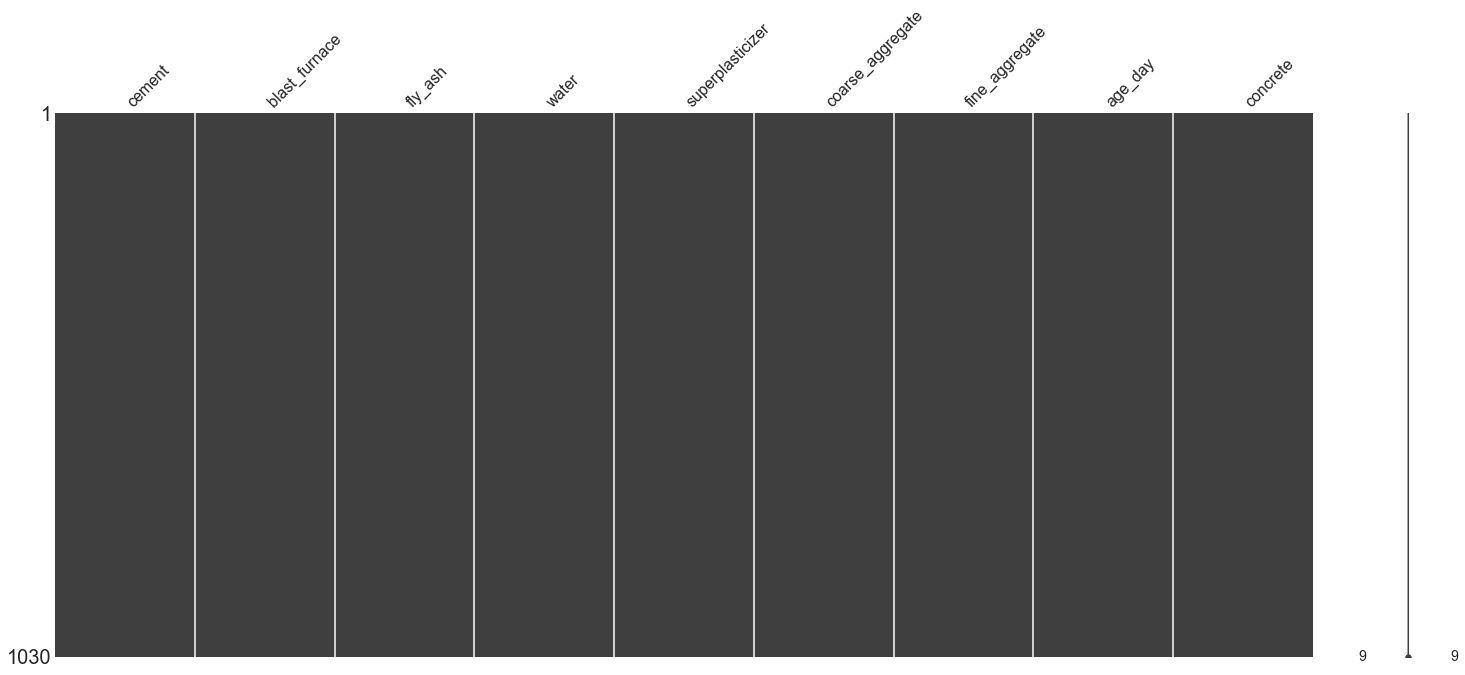

In [7]:
msngo.matrix(df)

In [8]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled['concrete'] = np.log(df['concrete']).to_numpy()
df_scaled.head()

,cement,blast_furnace,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age_day,concrete
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,4.381902
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,4.125359
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,3.695607
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,3.714791
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,3.790985


Text(0.5, 1.0, 'Histograma Logaritmo de concrete')

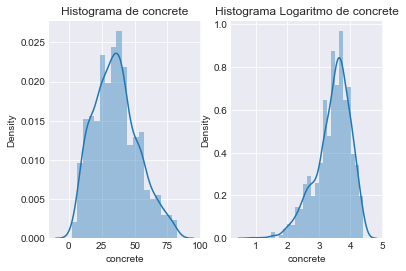

In [9]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df['concrete'], bins = 'fd', ax = ax[0])
ax[0].set_title('Histograma de concrete')
sns.distplot(df_scaled['concrete'], bins = 'fd', ax = ax[1])
ax[1].set_title('Histograma Logaritmo de concrete')

In [10]:
X = df_scaled.iloc[:, 1:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['concrete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 15820)

In [11]:
alphas = np.logspace(0, 7, base = 10)
alphas

array([1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03, 1.38949549e+03, 1.93069773e+03,
       2.68269580e+03, 3.72759372e+03, 5.17947468e+03, 7.19685673e+03,
       1.00000000e+04, 1.38949549e+04, 1.93069773e+04, 2.68269580e+04,
       3.72759372e+04, 5.17947468e+04, 7.19685673e+04, 1.00000000e+05,
       1.38949549e+05, 1.93069773e+05, 2.68269580e+05, 3.72759372e+05,
       5.17947468e+05, 7.19685673e+05, 1.00000000e+06, 1.38949549e+06,
       1.93069773e+06, 2.68269580e+06, 3.72759372e+06, 5.17947468e+06,
       7.19685673e+06, 1.00000000e+07])

In [12]:
names_regressors = X_train.columns
names_regressors

Index(['blast_furnace', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age_day', 'concrete',
       'intercept'],
      dtype='object')

In [13]:
coefs_ridge, cv_err_ridge = [], []
model_ridge = Ridge(fit_intercept = True)

In [14]:
for a in alphas:
        model_ridge.set_params(alpha = a)
        model_ridge.fit(X_train, y_train)
        coefs_ridge.append(model_ridge.coef_)
        dummy, cv_err_estimates = gfx.cv_error(X_train, y_train, k = 10, method = 'ridge', alpha = a)
        cv_err_ridge.append(np.mean(cv_err_estimates))

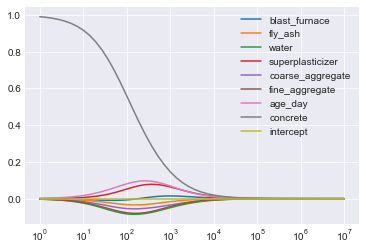

In [15]:
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs_ridge).T, names_regressors):
        plt.plot(alphas, y_arr, label = label)

ax.set_xscale('log')
plt.legend(loc = 1)

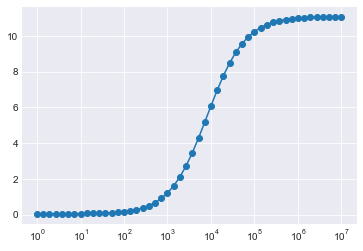

In [16]:
ax = plt.gca()
plt.plot(alphas, np.sqrt(cv_err_ridge), 'o-')
ax.set_xscale('log')

In [17]:
ridge_cv = RidgeCV(cv = 10)
model_ridge_cv = ridge_cv.fit(X_train, y_train)

In [18]:
model_ridge_cv.alpha_

0.1

In [19]:
model_ridge_cv.coef_

array([-5.72080412e-05, -9.58185274e-05, -2.90383714e-04,  6.31854027e-05,
       -1.90396747e-04, -2.48745514e-04,  1.95240478e-04,  9.99078179e-01,
        0.00000000e+00])

In [20]:
print(r2_score(model_ridge_cv.predict(X_test), y_test))

0.9999995867960646


In [21]:
alphas = np.logspace(0, -3, base = 10)
alphas

array([1.        , 0.86851137, 0.75431201, 0.65512856, 0.5689866 ,
       0.49417134, 0.42919343, 0.37275937, 0.32374575, 0.28117687,
       0.24420531, 0.21209509, 0.184207  , 0.15998587, 0.13894955,
       0.12067926, 0.10481131, 0.09102982, 0.07906043, 0.06866488,
       0.05963623, 0.05179475, 0.04498433, 0.0390694 , 0.03393222,
       0.02947052, 0.02559548, 0.02222996, 0.01930698, 0.01676833,
       0.01456348, 0.01264855, 0.01098541, 0.00954095, 0.00828643,
       0.00719686, 0.00625055, 0.00542868, 0.00471487, 0.00409492,
       0.00355648, 0.00308884, 0.0026827 , 0.00232995, 0.00202359,
       0.00175751, 0.00152642, 0.00132571, 0.0011514 , 0.001     ])

In [22]:
coefs_lasso, cv_err_lasso = [], []
model_lasso = Lasso(fit_intercept = True)

for a in alphas:
        model_lasso.set_params(alpha = a)
        model_lasso.fit(X_train, y_train)
        coefs_lasso.append(model_lasso.coef_)
        dummy, cv_err_estimates = gfx.cv_error(X_train, y_train, k = 10, method = 'ridge', alpha = a)
        cv_err_lasso.append(np.mean(cv_err_estimates))

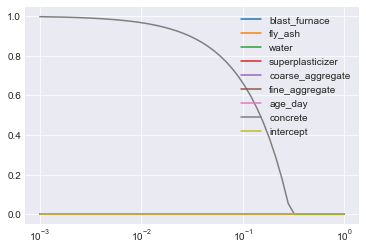

In [23]:
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs_lasso).T, names_regressors):
        plt.plot(alphas, y_arr, label = label)

ax.set_xscale('log')
plt.legend(loc = 1)

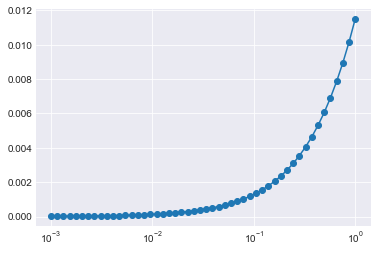

In [24]:
ax = plt.gca()
plt.plot(alphas, np.sqrt(cv_err_lasso), 'o-')
ax.set_xscale('log')

In [25]:
lasso_cv = LassoCV()
model_lasso_cv = lasso_cv.fit(X_train, y_train)

In [26]:
model_lasso_cv.alpha_

0.0002973658665179665

In [27]:
model_lasso_cv.coef_

array([ 0.   , -0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.999,
        0.   ])

In [28]:
print(r2_score(model_lasso_cv.predict(X_test), y_test))

0.9999989934040124


In [29]:
alphas = np.logspace(0, -3, base = 10)
alphas

array([1.        , 0.86851137, 0.75431201, 0.65512856, 0.5689866 ,
       0.49417134, 0.42919343, 0.37275937, 0.32374575, 0.28117687,
       0.24420531, 0.21209509, 0.184207  , 0.15998587, 0.13894955,
       0.12067926, 0.10481131, 0.09102982, 0.07906043, 0.06866488,
       0.05963623, 0.05179475, 0.04498433, 0.0390694 , 0.03393222,
       0.02947052, 0.02559548, 0.02222996, 0.01930698, 0.01676833,
       0.01456348, 0.01264855, 0.01098541, 0.00954095, 0.00828643,
       0.00719686, 0.00625055, 0.00542868, 0.00471487, 0.00409492,
       0.00355648, 0.00308884, 0.0026827 , 0.00232995, 0.00202359,
       0.00175751, 0.00152642, 0.00132571, 0.0011514 , 0.001     ])

In [30]:
coefs_elastic_net, cv_err_elastic_net = [], []
model_elastic_net = ElasticNet(fit_intercept = True)

for a in alphas:
        model_elastic_net.set_params(alpha = a)
        model_elastic_net.fit(X_train, y_train)
        coefs_elastic_net.append(model_elastic_net.coef_)
        dummy, cv_err_estimates = gfx.cv_error(X_train, y_train, method = 'enet', k = 10, alpha = a)
        cv_err_elastic_net.append(np.mean(cv_err_estimates))

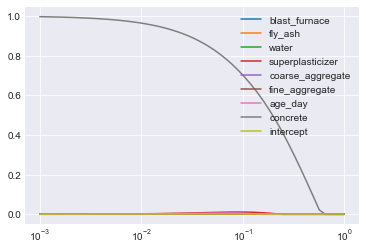

In [31]:
ax = plt.gca()

for y_arr, label in zip(np.squeeze(coefs_elastic_net).T, names_regressors):
        plt.plot(alphas, y_arr, label = label)

ax.set_xscale('log')
plt.legend(loc = 1)

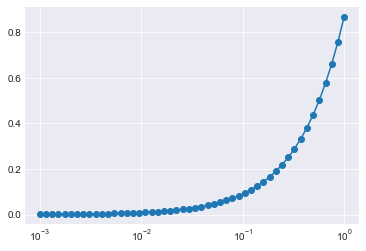

In [32]:
ax = plt.gca()
plt.plot(alphas, np.sqrt(cv_err_elastic_net), 'o-')
ax.set_xscale('log')

In [33]:
elastic_cv = ElasticNetCV(cv = 10)
model_elastic_net_cv = elastic_cv.fit(X_train, y_train)
model_elastic_net_cv.alpha_

0.0005947317330359331

In [34]:
model_elastic_net_cv.coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.89158899e-04,
       -0.00000000e+00, -0.00000000e+00,  1.41980616e-04,  9.97783924e-01,
        0.00000000e+00])

In [35]:
print(r2_score(model_elastic_net_cv.predict(X_test), y_test))

0.9999957336483718
